#### (2006) Clustering by the K-Means Algorithm Using a Split and Merge Procedure

In [1]:
%load_ext autoreload
%autoreload 2
#Basic package
import math
import random
import time
import numpy as np
import pandas as pd
import xlwt
#ML
from scipy.spatial.distance import cdist
from scipy.cluster.vq import vq
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans  
from sklearn.datasets import make_blobs
from sklearn import cluster, datasets
#Plot
from matplotlib.pyplot import *
from pylab import *
import matplotlib.pyplot as plt
#functions for the framework
from util import *
from related_SM_algorithm import *

import warnings
warnings.filterwarnings('ignore')

# Data visulazation

* a1.csv: 20 clusters
* a2.csv: 35 clusters
* a3.csv: 50 clusters
* s1.csv: 9% overlap
* s2.csv: 22% overlap
* s3.csv: 41% overlap
* s4.csv: 44% overlap
* unbalance.csv
* dim032.csv  
* dim064.csv
* dim128.csv
* dim256.csv
* dim512.csv
* dim 1024.csv
* birch1.csv
* birch2.csv
* birch3.csv

In [4]:
##################
data = 'a1.csv'
##################

Text(0.5, 1.0, 'a1')

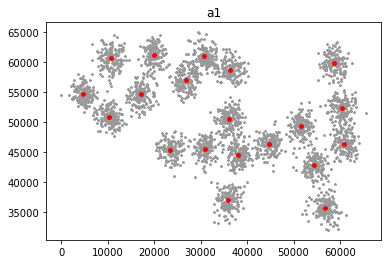

In [5]:
dataMat = pd.read_csv('./Raw_data/all/'+data, header=None, dtype=np.float64).values
plt.scatter(dataMat[:, 0],dataMat[:, 1], s=5, c='0.6', marker='*')
gt = pd.read_csv('./Groundtruth/all/'+data, dtype=np.float64).values
plt.scatter(gt[:, 0],gt[:, 1], s=15, c='r', marker='o')
plt.title(data.strip(".csv"))

# Experiment Setting

In [6]:
def expriment_forced(data, trials, data_gt=None, init_method='random', maxIter=30):
    if data_gt==None:
        data_gt = data
    ####raw_data####
    X = pd.read_csv('./Raw_data/all/'+data, header=None, dtype=np.float64).values 
    ####ground truth####
    gt = pd.read_csv('./Groundtruth/all/'+data_gt, dtype=np.float64).values
    ##################
    ####setting####
    ##################
    k = len(gt)
    SSE_list = []
    CI_list = []
    Iters = []
    K_num = []
    Success_rate = 0 
    ##################
    ####Groud truth SSE
    ##################
    gt_model = KMeans(n_clusters=k,init=gt, random_state = 0, n_init=1, algorithm='full').fit(X)
    gt_sse = gt_model.inertia_
    ##################          
    #Main Loop
    ################## 
    start_time=time.time()
    for i in range(trials):
        store_C,SSE = Frce_kmeans(X, k, seed=i, kmax=4)
        ##################          
        #Centroid Index
        ################## 
        CI = Centroid_Index(gt,store_C[-1]) 
        CI_list.append(CI)
        SSE_list.append(SSE[-1])
        if CI == 0:
            Success_rate+=1 
        K_num.append(len(store_C[-1]))
    Success_rate = Success_rate/trials * 100
    AMR = np.mean(CI_list)/k
    SSE_ratio = np.array(SSE_list)/gt_sse
    SSE_ratio_mean = np.mean(SSE_ratio)
    SSE_ratio_std = np.std(SSE_ratio)
    Iters_mean = 1 #forced alg only have one iter
    elapse_time = time.time()-start_time
    
    return (Success_rate, AMR, SSE_ratio_mean, SSE_ratio_std, Iters_mean, elapse_time)

In [7]:
experiment_record = {}
datasets = ['a1.csv', 'a2.csv', 'a3.csv']
           #'s1.csv', 's2.csv', 's3.csv','s4.csv',
           #'unbalance.csv','dim032.csv','birch1.csv']

for index, data in enumerate(datasets):
    print (data)

    Success_rate, AMR, SSE_ratio_mean, SSE_ratio_std, Iters_mean, elapse_time=expriment_forced(data, trials=2, data_gt=None)
    experiment_record[index*1]= {'dataset': data,
                                       'success_rate': Success_rate,
                                       'AMR': AMR,
                                       'SSE_ratio_mean': SSE_ratio_mean,
                                       'SSE_ratio_std': SSE_ratio_std,
                                       'Iters': Iters_mean,
                                       'Time': elapse_time}

    
pd.DataFrame.from_dict(experiment_record, orient='index')

a1.csv
a2.csv
a3.csv


,dataset,success_rate,AMR,SSE_ratio_mean,SSE_ratio_std,Iters,Time
0,a1.csv,100.0,0.0,0.999646,5.398186e-07,1,2.323608
1,a2.csv,100.0,0.0,1.000028,8.014457e-05,1,4.411406
2,a3.csv,100.0,0.0,1.000039,8.149557e-06,1,7.240817


# Simple Test

In [8]:
X = dataMat
store_C,sse = Frce_kmeans(X, 20, 0)

<Figure size 432x288 with 0 Axes>

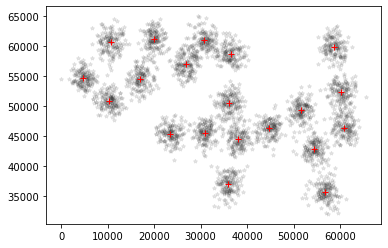

In [10]:
#--------------------------------------------------------------------------------
#------------------------------------Figure--------------------------------------
#--------------------------------------------------------------------------------
figure()
fig = plt.figure()
ax.set_title('Our Kmeans')
plot(dataMat[:, 0], dataMat[:, 1], 'k*',markerfacecolor=(0.5, 0.5, 0.5, 0.1), markersize=4)
plot(store_C[-1][:, 0],store_C[-1][:, 1], 'r+')